In [0]:
# Install latex for the plots
! sudo apt-get update
! sudo apt-get install texlive-latex-recommended #1
! sudo apt-get install dvipng texlive-fonts-recommended #2
! wget http://mirrors.ctan.org/macros/latex/contrib/type1cm.zip #3
! unzip type1cm.zip -d /tmp/type1cm #4
! cd /tmp/type1cm/type1cm/ && sudo latex type1cm.ins  #5
! sudo mkdir /usr/share/texmf/tex/latex/type1cm #6
! sudo cp /tmp/type1cm/type1cm/type1cm.sty /usr/share/texmf/tex/latex/type1cm #7
! sudo texhash #8

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [564 B]
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [819 B]
Get:6 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:7 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Hit:9 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages [113 kB]
Get:11 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Get:12 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:13 http://ppa.lau

In [0]:
# Google Drive stuff for colab
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
%cd  /content/drive/My\ Drive/Year\ 4\:\ Synthesis/NS162\:\ Statistical\ Mechanics/Renormalization\ Research\ Project/renormalization/supervised_convnet/t_2.269/3x3/

In [0]:
# import stuff
import matplotlib.pyplot as plt
import train, frozen
import sys
sys.path.insert(0, "../../")
import supervised_convnet
import pickle
from collections import defaultdict
import numpy as np
from matplotlib import rc
rc('font',**{'size': 25})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

Uncorrelated [[ 1  1  1 -1 -1 -1  1 -1 -1]
 [ 1  1  1 -1 -1 -1 -1 -1 -1]
 [ 1  1  1 -1  1  1  1  1  1]
 [ 1  1 -1  1 -1 -1 -1 -1 -1]
 [ 1  1 -1  1 -1 -1 -1 -1 -1]
 [ 1  1  1  1 -1 -1 -1 -1  1]
 [ 1  1 -1 -1 -1 -1  1  1  1]
 [ 1 -1 -1 -1 -1 -1  1  1  1]
 [ 1  1  1 -1 -1 -1  1  1 -1]]
Correlated [[ 1  1 -1  1 -1 -1 -1 -1  1]
 [ 1  1 -1 -1 -1 -1 -1 -1 -1]
 [ 1  1 -1 -1 -1  1  1  1  1]
 [-1 -1 -1 -1 -1 -1  1  1  1]
 [ 1 -1 -1 -1 -1  1  1  1  1]
 [-1 -1 -1 -1 -1  1  1  1  1]
 [-1 -1 -1 -1 -1  1  1 -1 -1]
 [-1 -1 -1 -1 -1 -1  1  1  1]
 [-1 -1  1 -1 -1 -1 -1 -1  1]]


# Histogram of unfrozen vs. frozen

mean 0.897299
500
std 0.0002986841107256966
mean 0.9085140000000002
500
std 0.0004175255776596211


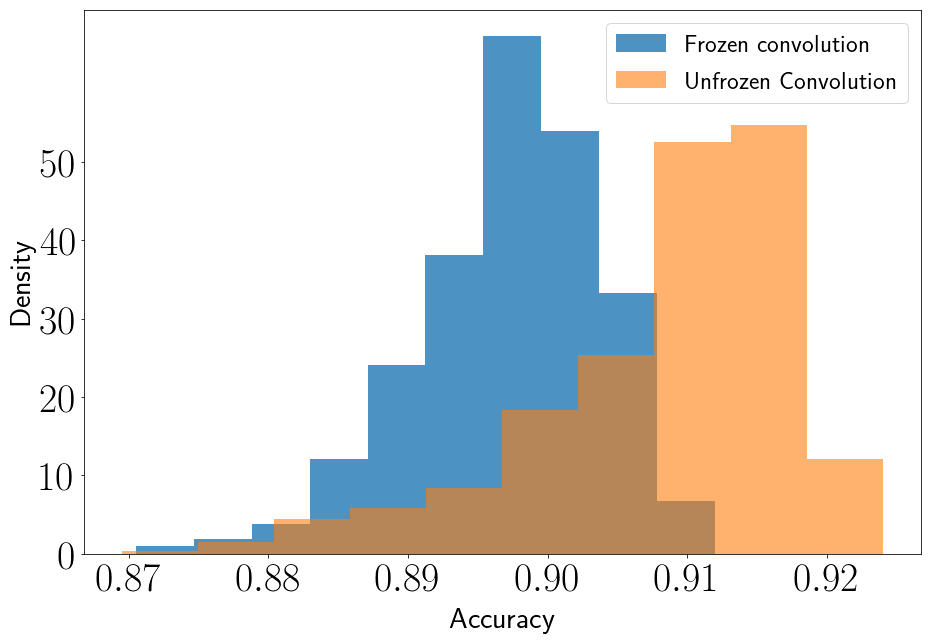

In [0]:
import subprocess
# subprocess.check_call(["latex"])
import os 
os.environ["PATH"] += os.pathsep + '/usr/bin'
prefix = "results_before_09-11/"
filenames = ["frozen_convolution_pretrained_relu.pl", "frozen_convolution_no_center_relu.pl",
        "unfrozen_convolution_relu.pl"]#, "frozen_convolution_with_center_relu.pl"]
labels = [ "Frozen convolution",
"Unfrozen Convolution", "Frozen convolution, pretrained","frozen convolution with center relu"]
alphas = [0.8, 0.6, 0.4, 0.2]
plt.figure(figsize=(15,10))
plt.xlabel("Accuracy", fontsize = 30)
plt.ylabel("Density", fontsize = 30)
for index, filename in enumerate(filenames[1:3]):
    with open(prefix + filename, "rb") as handle:
        results = pickle.load(handle)
    if index <= 2:
        b = np.array(results["best_val_acc_hist"])
        b = (b[b > 0.6])
        plt.hist(b, alpha = alphas[index], label = labels[index], density=True)
        plt.xticks(np.arange(0.87, 0.92, 0.01), fontsize = 40)
        plt.yticks(np.arange(0, 60, 10), fontsize = 40)
        print("mean", np.mean(b))
        print(len(b))
        print("std", np.std(b)/np.sqrt(len(b)))
    else:
        plt.hist(results, alpha = alphas[index], label = labels[index], normed=True)
    # print("filename", filename)
    # print("mean", np.mean(results))
    # print("std", np.std(results))
plt.legend()

# Histogram for 1 channel vs. many channels

mean 0.9080020080321285
498
std 0.0004552745046303493
mean 0.911544
500
std 0.0003727199055591212
mean 0.914556
500
std 0.00028747474323842796


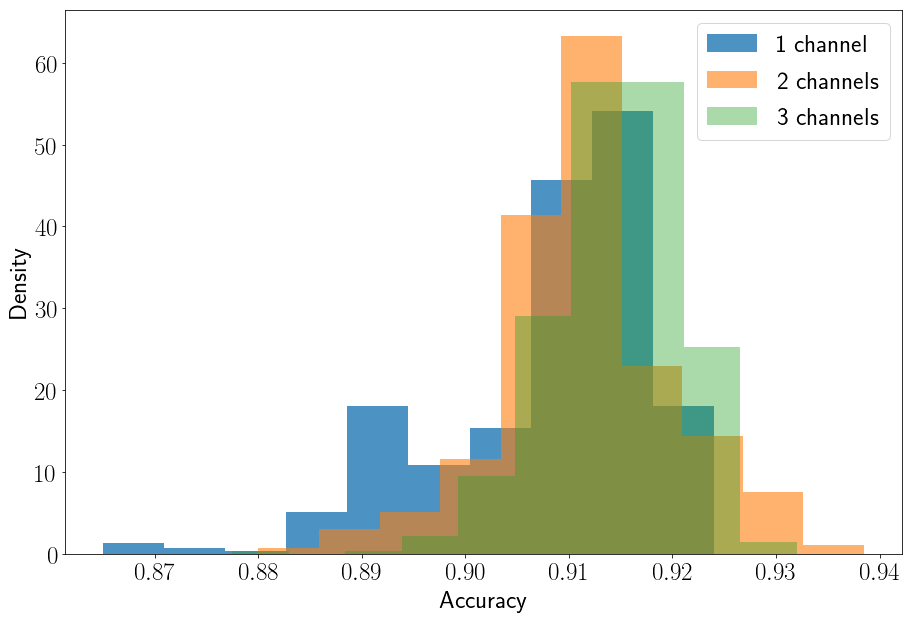

In [0]:
prefix = ""
filenames = ["unfrozen_convolution_relu.pl", "unfrozen_convolution_2_channels.pl", "unfrozen_convolution_3_channels.pl",
        ]#, "frozen_convolution_with_center_relu.pl"]
labels = ["1 channel","2 channels", "3 channels", "frozen convolution with center relu"]
alphas = [0.8, 0.6, 0.4, 0.2]
plt.figure(figsize=(15,10))
plt.xlabel("Accuracy")
plt.ylabel("Density")
for index, filename in enumerate(filenames[:3]):
    with open(prefix + filename, "rb") as handle:
        results = pickle.load(handle)
    if index <= 2:
        b = np.array(results["best_val_acc_hist"])
        b = (b[b > 0.6])
        plt.hist(b, 10, alpha = alphas[index], label = labels[index], density=True)
        print("mean", np.mean(b))
        print(len(b))
        print("std", np.std(b)/np.sqrt(len(b)))
    else:
        plt.hist(results, alpha = alphas[index], label = labels[index], normed=True)
    # print("filename", filename)
    # print("mean", np.mean(results))
    # print("std", np.std(results))
plt.legend()

# Weights histogram

axs (3, 3)
labels ['Frozen \n convolution']


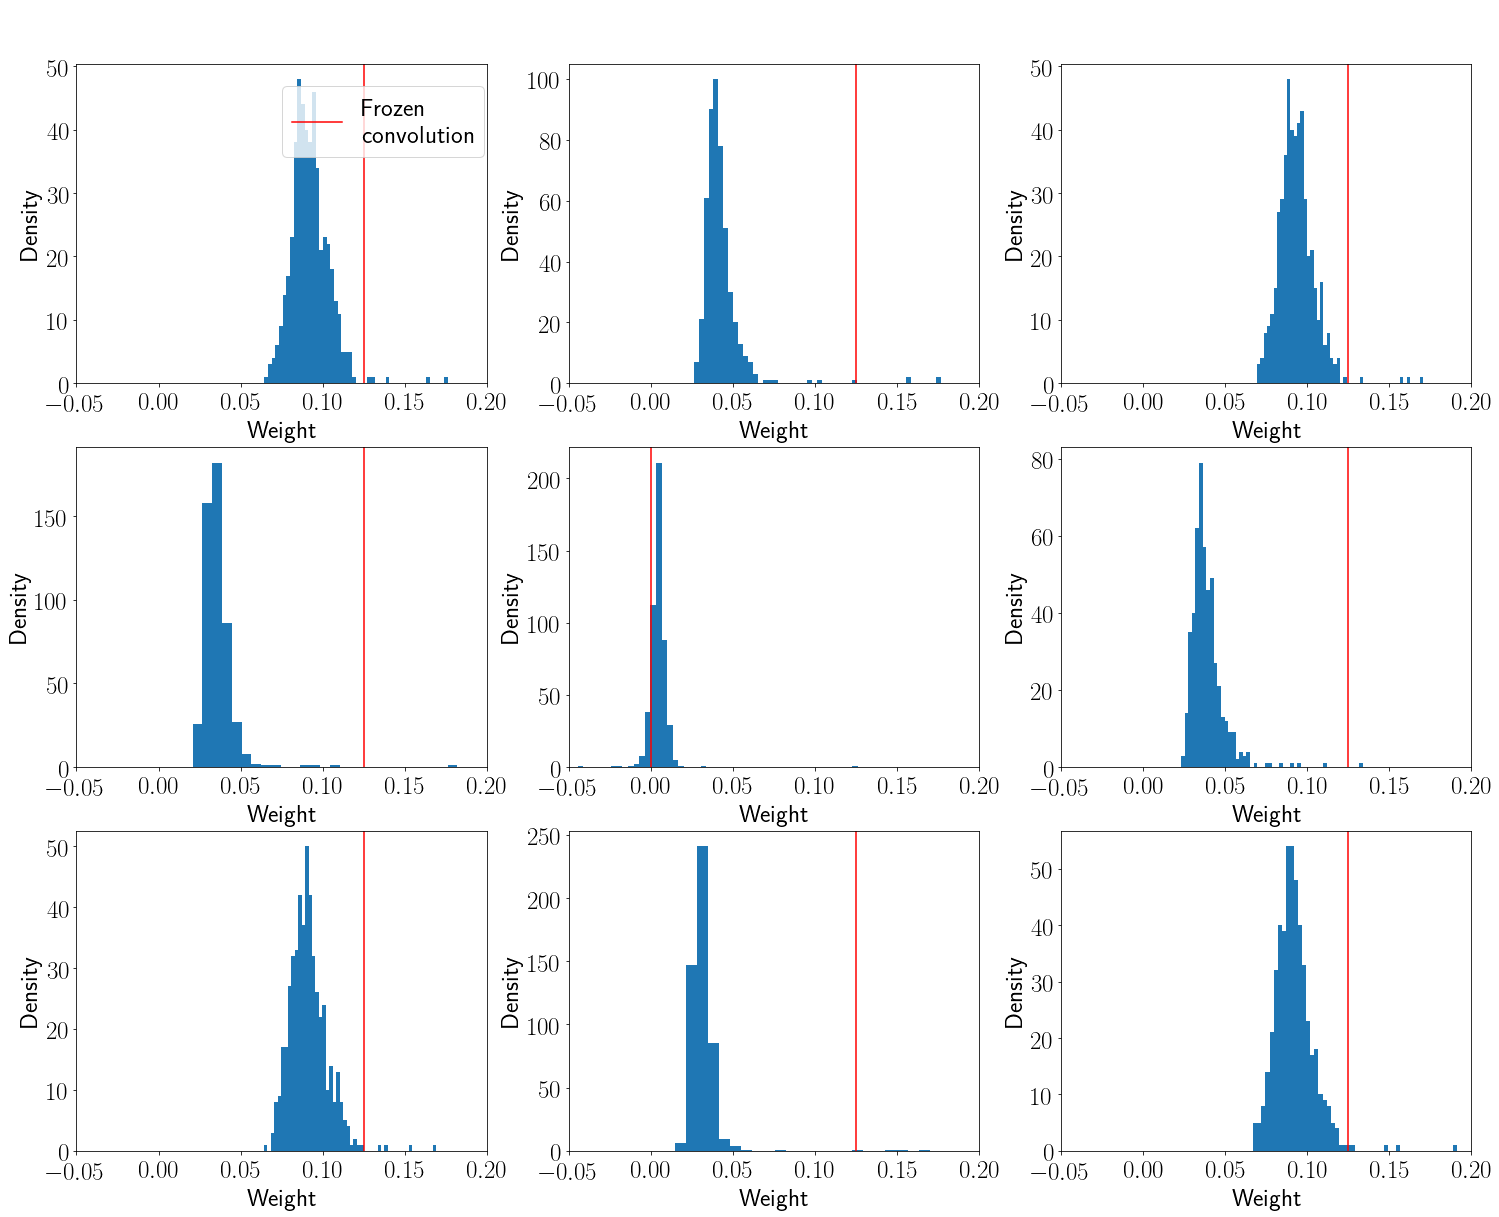

In [0]:
with open("unfrozen_convolution_relu.pl", "rb") as handle:
    results = pickle.load(handle)
w = results["conv_params"]
a,b,c,d,e,f,g,h,i = [], [], [], [], [], [], [], [], []
for par in w["weight"]:
    left_corner = par[0, 0, 0, 0]
    sign_convention = np.sign(left_corner)
    a.append(np.abs(left_corner))
    b.append(par[0, 0, 0, 1] * sign_convention)
    c.append(par[0, 0, 0, 2] * sign_convention)
    d.append(par[0, 0, 1, 0] * sign_convention)
    e.append(par[0, 0, 1, 1] * sign_convention)
    f.append(par[0, 0, 1, 2] * sign_convention)
    g.append(par[0, 0, 2, 0] * sign_convention)
    h.append(par[0, 0, 2, 1] * sign_convention)
    i.append(par[0, 0, 2, 2] * sign_convention)
a,b,c,d,e,f,g,h,i = [np.array(_)[np.abs(np.array(_)) < 0.2] for _ in [a,b,c,d,e,f,g,h,i]]
fig, axs = plt.subplots(3, 3)
print("axs", axs.shape)
fig.set_figheight(20)
fig.set_figwidth(25)
axs[0, 0].hist(a, 50)
axs[0, 0].axvline(1/8, color = "r", label = "Frozen \n convolution")
axs[0, 0].set_xlim(-0.05, 0.2)
axs[0, 1].hist(b, 50)
axs[0, 1].axvline(1/8, color = "r")
axs[0, 1].set_xlim(-0.05, 0.2)
axs[0, 2].hist(c, 50)
axs[0, 2].axvline(1/8, color = "r")
axs[0, 2].set_xlim(-0.05, 0.2)
axs[1, 0].hist(d, 50)
axs[1, 0].axvline(1/8, color = "r")
axs[1, 0].set_xlim(-0.05, 0.2)
axs[1, 1].hist(e, 50)
axs[1, 1].axvline(0, color = "r")
axs[1, 1].set_xlim(-0.05, 0.2)
axs[1, 2].hist(f, 50)
axs[1, 2].axvline(1/8, color = "r")
axs[1, 2].set_xlim(-0.05, 0.2)
axs[2, 0].hist(g, 50)
axs[2, 0].axvline(1/8, color = "r")
axs[2, 0].set_xlim(-0.05, 0.2)
axs[2, 1].hist(h, 50)
axs[2, 1].axvline(1/8, color = "r")
axs[2, 1].set_xlim(-0.05, 0.2)
axs[2, 2].hist(i, 50)
axs[2, 2].axvline(1/8, color = "r")
axs[2, 2].set_xlim(-0.05, 0.2)
for i in range(3):
    for j in range(3):
        axs[i, j].set_xlabel("Weight")
        axs[i, j].set_ylabel("Density")
handles, labels = axs[0, 0].get_legend_handles_labels()
print("labels", labels)
fig.legend(handles, labels, loc=(0.188, 0.87))
fig.show()

# Hyperparameter tuning stuff

In [0]:
!pip install -U --target=/usr/local/lib/python3.6/dist-packages git+https://github.com/anhhuyalex/Ax.git
  
%cd /content
# %cd /usr/local/lib/python3.6/dist-packages
!rm -rf botorch
%cd /content
!git clone https://github.com/pytorch/botorch.git
%cd botorch
!pip install .

  Cloning https://github.com/anhhuyalex/Ax.git to /tmp/pip-req-build-jtszmw_4
  Running command git clone -q https://github.com/anhhuyalex/Ax.git /tmp/pip-req-build-jtszmw_4
     |████████████████████████████████| 174kB 5.0MB/s 
     |████████████████████████████████| 133kB 46.1MB/s 
     |████████████████████████████████| 10.5MB 45.2MB/s 
     |████████████████████████████████| 25.2MB 44.0MB/s 
     |████████████████████████████████| 7.1MB 29.1MB/s 
     |████████████████████████████████| 748.9MB 16kB/s 
     |████████████████████████████████| 215kB 37.6MB/s 
     |████████████████████████████████| 235kB 40.0MB/s 
     |████████████████████████████████| 512kB 45.5MB/s 
     |████████████████████████████████| 20.4MB 32.8MB/s 
     |████████████████████████████████| 6.7MB 34.9MB/s 
     |████████████████████████████████| 286kB 42.9MB/s 
  Created wheel for ax-platform: filename=ax_platform-0.1.4-cp36-cp36m-linux_x86_64.whl size=918246 sha256=641e6d5a2b2257e17efddfb806ec1ae77ac80fc294386

/content
/content
Cloning into 'botorch'...
remote: Enumerating objects: 5976, done.
remote: Total 5976 (delta 0), reused 0 (delta 0), pack-reused 5976
Receiving objects: 100% (5976/5976), 10.31 MiB | 16.78 MiB/s, done.
Resolving deltas: 100% (3899/3899), done.
/content/botorch
Processing /content/botorch
  Created wheel for botorch: filename=botorch-0.1.3-cp36-none-any.whl size=175825 sha256=65ce91cf51bd45a64ffecd33ccdb2a9a43898831891c44df2e0a67016cfd33b1
  Stored in directory: /tmp/pip-ephem-wheel-cache-yqt8d5dr/wheels/d8/0e/3f/502176509633fec729eabc1a42e465b3603faf0c30b4782f33
Successfully built botorch
  Found existing installation: botorch 0.1.3
    Uninstalling botorch-0.1.3:
      Successfully uninstalled botorch-0.1.3


In [0]:
# %cd  /content/drive/My\ Drive/Year\ 4\:\ Synthesis/NS162\:\ Statistical\ Mechanics/Renormalization\ Research\ Project/renormalization/supervised_convnet/t_2.269/3x3/
import pickle
# run_mode = "frozen_convolution_no_center_relu"
# run_mode = "frozen_convolution_pretrained_relu"
# run_mode = "unfrozen_convolution_relu"
run_mode = "unfrozen_convolution_3_channels"
# run_mode = "unfrozen_convolution_2_channels"
with open(f"colab/hyperparameters_{run_mode}.pl", "rb") as handle:
    hyper = pickle.load(handle)

In [0]:


from ax import RangeParameter, ParameterType
from ax.service.ax_client import AxClient
from ax.plot.contour import plot_contour
from ax.plot.trace import optimization_trace_single_method
from ax.service.managed_loop import optimize
from ax.utils.notebook.plotting import render, init_notebook_plotting

ax_client = AxClient()
ax_client = ax_client.from_json_snapshot(hyper["axclient"])

In [0]:
#pre-trained
ax_client.get_best_parameters()

({'batch_size': 5000,
  'betas0': 0.20000000000000004,
  'betas1': 1.0081196321129792e-05,
  'lr': 0.02564592414390474,
  'n_epochs': 180,
  'train_size': 5000,
  'weight_decay': 6.21073259786956e-05},
 ({'objective': 0.903033105700047},
  {'objective': {'objective': 5.147060778236302e-05}}))

In [0]:
#unfrozen_convolution_relu
ax_client.get_best_parameters()

({'batch_size': 86,
  'train_size': 4277,
  'n_epochs': 250,
  'lr': 0.004388469485690077,
  'weight_decay': 2.346792703571872e-05,
  'betas0': 0.0018179320494754046,
  'betas1': 0.001354073715524798},
 ({'objective': 0.9050338479075092},
  {'objective': {'objective': 4.757005812926546e-06}}))

In [0]:
#frozen_convolution_no_center_relu
ax_client.get_best_parameters()

({'batch_size': 100,
  'betas0': 0.15428681703555264,
  'betas1': 1e-05,
  'lr': 0.021919796543990972,
  'n_epochs': 250,
  'train_size': 5000,
  'weight_decay': 0.0008230830669560186},
 ({'objective': 0.9005434515585102},
  {'objective': {'objective': 0.0003031106598752843}}))

In [0]:
#unfrozen_convolution_2_channels
ax_client.get_best_parameters()

({'batch_size': 968,
  'train_size': 5000,
  'n_epochs': 250,
  'lr': 0.0070890201458810925,
  'weight_decay': 0.00019488234448160615,
  'betas0': 0.13209249743733834,
  'betas1': 9.581886527012395e-05},
 ({'objective': 0.9095199693508492},
  {'objective': {'objective': 2.6589601760250542e-05}}))

In [0]:
#unfrozen_convolution_3_channels
ax_client.get_best_parameters()

({'batch_size': 3521,
  'train_size': 5000,
  'n_epochs': 193,
  'lr': 0.008499899017388025,
  'weight_decay': 7.165827861901277e-05,
  'betas0': 0.20000000000000004,
  'betas1': 0.003211923010710316},
 ({'objective': 0.9182530304574827},
  {'objective': {'objective': 2.107995656736222e-06}}))

# Mutual info calculation

In [1]:
import matplotlib.pyplot as plt
import train, frozen
import sys
sys.path.insert(0, "../../")
import supervised_convnet
import pickle
from collections import defaultdict
import numpy as np
from matplotlib import rc
rc('font',**{'size': 20})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

ModuleNotFoundError: ignored

In [0]:
# Mutual information calculation
import numpy as np
from collections import defaultdict
import hashlib
correlated_data = np.load("../ising81x81_temp2.269.npy")

In [0]:
correlated_data[0, :9, :9]

array([[ 1,  1, -1,  1, -1, -1, -1, -1,  1],
       [ 1,  1, -1, -1, -1, -1, -1, -1, -1],
       [ 1,  1, -1, -1, -1,  1,  1,  1,  1],
       [-1, -1, -1, -1, -1, -1,  1,  1,  1],
       [ 1, -1, -1, -1, -1,  1,  1,  1,  1],
       [-1, -1, -1, -1, -1,  1,  1,  1,  1],
       [-1, -1, -1, -1, -1,  1,  1, -1, -1],
       [-1, -1, -1, -1, -1, -1,  1,  1,  1],
       [-1, -1,  1, -1, -1, -1, -1, -1,  1]])

In [0]:
def get_key(array):
    return hashlib.sha256(array.tostring()).hexdigest()
  
def normalize_counts(p_dict):
    normalizer = sum(p_dict.values())
    for config, count in p_dict.items():
        p_dict[config] = count / normalizer
    return p_dict

def mutual_info_fine_grained_boundary_3(data):
    """
    boundary is only the 3x3 bordering strip
    x x *x* | *x* x x
    x x *x* | *x* x x
    x x *x* | *x* x x
    """
    n_samples, n_rows, n_columns = data.shape
    print(n_samples, n_rows, n_columns)
    
    # compute counts
    p_xy = defaultdict(int)
    p_x = defaultdict(int)
    p_y = defaultdict(int)
    n_samples = 100 # for testing, remove later
    for sample in range(n_samples):
        if sample % 100 == 0:
            print(sample, p_xy)
        for row in range(n_rows - 3):
            for column in range(n_columns - 6):
                rectangle = data[sample, row:(row + 3), column:(column+6)]
                
                boundary_x = rectangle[:, 0]
                p_x[get_key(boundary_x)] += 1
                boundary_y = rectangle[:, 5]
                p_y[get_key(boundary_y)] += 1
                joint_boundary = np.hstack((boundary_x, boundary_y))
                p_xy[get_key(joint_boundary)] += 1


    # Normalize counts
    p_xy = normalize_counts(p_xy)
    p_x = normalize_counts(p_x)
    p_y = normalize_counts(p_y)
        
        
    
    # Generate all possible configurations of boundary conditions
    n = 6
    i = np.array(np.indices(n * (2,))).reshape(n, -1)
    xy_keys = (i[:, np.argsort(i.sum(0)[::-1], kind='mergesort')].T[::-1].reshape(-1, 3, 2)*2-1)

    # mi = <log (p(x, y)/p(x)p(y))>
    mi = 0
    for xy in xy_keys:
        joint_prob = p_xy[get_key(xy)]
        x = xy[:, 0]
        x_prob = p_x[get_key(x)]
        y = xy[:, 1]
        y_prob = p_y[get_key(y)]
        mi += np.log2(joint_prob/(x_prob * y_prob)) * joint_prob
        
        
            
    return p_xy, p_x, p_y, mi

p_xy, p_x, p_y, mi = mutual_info_fine_grained_boundary_3(correlated_data)

In [0]:
len(p_xy.keys())

64

In [0]:
mi #100

0.677709341440649

In [0]:
def get_key(array):
    return hashlib.sha256(array.tostring()).hexdigest()
  
def normalize_counts(p_dict):
    normalizer = sum(p_dict.values())
    for config, count in p_dict.items():
        p_dict[config] = count / normalizer
    return p_dict

def mutual_info_fine_grained_all(data):
    """
    boundary is only the 3x3 bordering strip
    x x *x* | *x* x x
    x x *x* | *x* x x
    x x *x* | *x* x x
    """
    n_samples, n_rows, n_columns = data.shape
    print(n_samples, n_rows, n_columns)
    
    # compute counts
    p_xy = defaultdict(int)
    p_x = defaultdict(int)
    p_y = defaultdict(int)
#     n_samples = 1000 # for testing, remove later
    for sample in range(n_samples):
        if sample % 100 == 0:
            print(sample, p_xy)
        for row in range(n_rows - 3):
            for column in range(n_columns - 6):
                rectangle = data[sample, row:(row + 3), column:(column+6)]
#                 joint_boundary = rectangle[:, 2:4]
                p_xy[get_key(rectangle)] += 1
                boundary_x = rectangle[:, 0:3]
                p_x[get_key(boundary_x)] += 1
                boundary_y = rectangle[:, 3:6]
                p_y[get_key(boundary_y)] += 1


    # Normalize counts
    p_xy = normalize_counts(p_xy)
    p_x = normalize_counts(p_x)
    p_y = normalize_counts(p_y)
        
        
    
    # Generate all possible configurations of boundary conditions
    n = 18
    i = np.array(np.indices(n * (2,))).reshape(n, -1)
    xy_keys = (i[:, np.argsort(i.sum(0)[::-1], kind='mergesort')].T[::-1].reshape(-1, 3, 6)*2-1)

    # mi = <log (p(x, y)/p(x)p(y))>
    mi = 0
    for xy in xy_keys:
        joint_prob = p_xy[get_key(xy)]
        x = xy[:, 0:3]
        x_prob = p_x[get_key(x)]
        y = xy[:, 3:6]
        y_prob = p_y[get_key(y)]
        if joint_prob != 0:
            mi += np.log2(joint_prob/(x_prob * y_prob)) * joint_prob
        
        
            
    return p_xy, p_x, p_y, mi

p_xy, p_x, p_y, mi = mutual_info_fine_grained_all(correlated_data)

10000 81 81
0 defaultdict(<class 'int'>, {})


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [0]:
mi